# Scenario: HR Employee Records Data Cleaning and Preparation

A mid-sized company has gathered HR data to analyze workforce demographics, performance, and attendance trends. The dataset includes information such as employee IDs, names, department, date of joining, salary, performance scores, and attendance days. However, the data was collected from multiple sources, resulting in inconsistencies and errors that need to be addressed before it can be used for meaningful analysis.

## Dataset 1: Employee Records
- **Employee ID** – Unique identifier for each employee.
- **Employee Name** – Full name of the employee.
- **Department** – Department the employee works in (e.g., Sales, IT, HR, Finance).
- **Date of Joining** – The date the employee joined the company.
- **Salary** – Monthly salary of the employee.
- **Performance Score** – Performance rating for the year (scale of 1 to 5).
- **Attendance Days** – Number of days the employee attended work in the past year.

## Dataset 2: Employee Demographics
- **Employee ID** – Unique identifier for each employee.
- **Age** – The age of the employee.
- **Location** – The name of the city where the employee lives. 

Using the provided HR dataset, follow these steps in Python to ensure data quality and prepare it for analysis.

## Steps

1. **Correct Data Types**: Convert the `Date of Joining` column to a datetime format to ensure it is consistently treated as date.

2. **Identify and Remove Duplicates**: Remove duplicate records based on the rows to eliminate any duplicate entries.

3. **Ensure Data Consistency**: Standardise entries in the `Department` column to avoid variations, replacing values like "Human Resource" and "Information Technology" with "HR" and "IT" for consistency. Review and correct values in the `Attendance Days` column if any attendance is recorded as more than 360 days in a year, as this likely indicates a data entry error.

4. **Handling Missing Values**: Use the median value of the `Salary` column to fill in any missing salary data, ensuring an accurate representation without skewing averages.

5. **Detect and Handle Outliers**: Create a `Box plot` to identify the presence of outliers. Apply the standard outlier detection method for the `Salary` column using thresholds of `mean + 3 * standard deviation` and `mean - 3 * standard deviation` to identify potential outliers. 

6. **Feature Engineering - Create a Years of Service Column**: Calculate each employee's tenure by determining the difference in years between the current date and the `Date of Joining` column. This new `Years of Service` column helps analyse trends in compensation over tenure or experience.

7. **Data Integration**: Integrate the two datasets by merging them based on `Employee ID`.

## Loading the Datasets

In [2]:
import pandas as pd
from datetime import datetime
employee_records = pd.read_csv('Employee_Records.csv')
employee_demographics = pd.read_csv('Employee_Demographics.csv')

In [3]:
employee_records.head(5)

,Employee_ID,Employee_Name,Department,Date_of_Joining,Salary,Performance_Score,Attendance_Days,Years of Service
0,E001,Emily Chen,HR,20/03/2020,2500.0,2,240,NaN
1,E002,Rajesh Kumar,Human Resources,11/09/2019,8000.0,1,200,NaN
2,E003,Fatima Al-Sheikh,Information Technology,09/08/2018,6000.0,5,270,NaN
3,E004,Javier Hernandez,Information Technology,08/05/2020,7000.0,2,300,NaN
4,E005,Aiko Tanaka,HR,27/03/2017,3100.0,4,250,NaN


In [4]:
employee_demographics.head(5)

,Employee_ID,Location,Age
0,E001,London,40
1,E002,Birmingham,40
2,E003,Manchester,36
3,E004,Liverpool,27
4,E005,London,43


## Inspect Data Types using `.dtypes`  

In [5]:
# Write your code here 
employee_records.dtypes

Employee_ID           object
Employee_Name         object
Department            object
Date_of_Joining       object
Salary               float64
Performance_Score      int64
Attendance_Days        int64
Years of Service     float64
dtype: object

In [6]:
# Convert Date of Joining to datetime format using pd.to_datetime function
employee_records['Date_of_Joining'] = pd.to_datetime(employee_records['Date_of_Joining'], errors='coerce')

## Identify and Remove duplicate records

In [7]:
# Identify Duplicates
duplicates = employee_records[employee_records.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
   Employee_ID  Employee_Name       Department Date_of_Joining  Salary  \
50        E006   Ibrahim Omar  Human Resources      2020-02-29     NaN   
51        E007  Liam O'Connor            Sales      2016-01-23  3000.0   
52        E008    Sofia Rossi  Human Resources      2019-06-23  3100.0   
53        E009      Ming Zhao            Sales      2019-04-28  2500.0   
54        E010    Maria Silva          Finance      2017-08-31  5000.0   

    Performance_Score  Attendance_Days  Years of Service  
50                  4              260               NaN  
51                  4              270               NaN  
52                  2              270               NaN  
53                  1              240               NaN  
54                  1              240               NaN  


In [8]:
# Count the total number of rows before removing duplicates
row_count = employee_records.shape[0] # df.shape[0] returns the number of rows in the DataFrame.
print("Total number of rows:", row_count)

Total number of rows: 55


In [9]:
# Remove duplicate rows
employee_records = employee_records.drop_duplicates()

# Verify removal
print("Number of rows after removing duplicates:", employee_records.shape[0])

Number of rows after removing duplicates: 50


## Ensure Data Consistency
Standardise entries in the Department column to avoid variations, replacing values like "Human Resource" and "Information Technology" with "HR" and "IT" for consistency

In [10]:
#View unique Deparments
print(employee_records['Department'].unique())

['HR' 'Human Resources' 'Information Technology' 'Sales' 'Finance' 'IT']


In [11]:
# Replace "Human Resources` with "HR"
employee_records['Department'] = employee_records['Department'].replace("Human Resources", "HR")

In [12]:
# Replace "Information Technology" with "IT"
employee_records['Department'] = employee_records['Department'].replace("Information Technology", "IT")

In [13]:
# Filter dataset to retain entries with Attendance Days less than 360
employee_records = employee_records[employee_records['Attendance_Days'] < 360]

In [14]:
# Ensure that the department column is standardised by printing again the unique values
print(employee_records['Department'].unique())

['HR' 'IT' 'Sales' 'Finance']


## Handling Missing Values
Use the median value of the Salary column to fill in any missing salary data, ensuring an accurate representation without skewing averages.

In [15]:
# Fill missing values in the Salary column with the median salary
employee_records['Salary'].fillna(employee_records['Salary'].median(), inplace=True)


## Detect and Handle Outliers
- First create a `Box plot` to identify the presence of outliers.
- Next, apply the standard outlier detection method for the `Salary` column using thresholds of `mean + 3 * standard deviation` and `mean - 3 * standard deviation` to identify potential outliers. 

In [16]:
import matplotlib.pyplot as plt

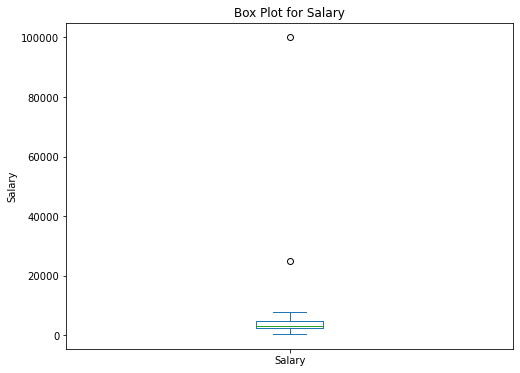

In [17]:
# Create a box plot for 'Salary' to visualise outliers
plt.figure(figsize=(8, 6)) # Sets the size of the plot.
employee_records['Salary'].plot(kind='box') # Creates a box plot for the `Salary` column.
plt.title('Box Plot for Salary') # Adding title
plt.ylabel('Salary') # Adds labels for clarity.
plt.show()

In [18]:
# Calculate the thresholds for outlier detection
salary_mean = employee_records['Salary'].mean()
salary_std = employee_records['Salary'].std()
lower_limit = salary_mean - 3 * salary_std
upper_limit = salary_mean + 3 * salary_std

# Identify potential outliers based on these thresholds
outliers = employee_records[(employee_records['Salary'] < lower_limit) | (employee_records['Salary'] > upper_limit)]

# Display potential outliers
outliers

,Employee_ID,Employee_Name,Department,Date_of_Joining,Salary,Performance_Score,Attendance_Days,Years of Service
32,E033,Reem Khaled,HR,2017-09-01,100000.0,3,180,NaN


## Create a Years of Service Column
Calculate each employee's tenure by determining the difference in years between the current date and the `Date of Joining` column. This new `Years of Service` column helps analyse trends in compensation over tenure or experience.

In [19]:
# Calculate Years of Service
employee_records['Years of Service'] = (datetime.now() - employee_records['Date_of_Joining']).dt.days // 365


## Data Integration 
Integrate the two datasets `employee_records` and `employee_demographics` by merging them based on `Employee ID`

In [20]:
#Use pd.merge to combine the datasets based on employee id 
employee_combined = pd.merge(employee_records, employee_demographics, on='Employee_ID', how='inner')
employee_combined

,Employee_ID,Employee_Name,Department,Date_of_Joining,Salary,Performance_Score,Attendance_Days,Years of Service,Location,Age
0,E001,Emily Chen,HR,2020-03-20,2500.0,2,240,4,London,40
1,E002,Rajesh Kumar,HR,2019-11-09,8000.0,1,200,5,Birmingham,40
2,E003,Fatima Al-Sheikh,IT,2018-09-08,6000.0,5,270,6,Manchester,36
3,E004,Javier Hernandez,IT,2020-08-05,7000.0,2,300,4,Liverpool,27
4,E005,Aiko Tanaka,HR,2017-03-27,3100.0,4,250,7,London,43
5,E006,Ibrahim Omar,HR,2020-02-29,3100.0,4,260,4,London,27
6,E007,Liam O'Connor,Sales,2016-01-23,3000.0,4,270,8,Birmingham,39
7,E008,Sofia Rossi,HR,2019-06-23,3100.0,2,270,5,Liverpool,34
8,E009,Ming Zhao,Sales,2019-04-28,2500.0,1,240,5,Liverpool,29
9,E010,Maria Silva,Finance,2017-08-31,5000.0,1,240,7,Birmingham,44
